# Data Analysis : Cyclistic bike-share

## Introduction

The case study involves a bikeshare company's data of its customer's trip details over a 12 month period (July 2020 - June 2021). The data has been made available by Motivate International Inc. under this [license](https://www.divvybikes.com/data-license-agreement).



## Scenario

Marketing team believes the company's future success depends on maximizing the number of annual memberships and they want to know how casual riders and annual members use platform differently. Depending on these insights, team will create a new marketing strategy to increase annual membership. As an analyst, i have to make recommendations backed up with compelling data insights and professional data visualizations.

## Objective

The objective of the analysis is to get some insights on how the casual riders and annual memberships uses Cyclistic bikeshare  differently, based on a few parameters available from the existing data.

## Data Sources

A total of 12 datasets have been made available for each month starting from July 2020 to June 2021. Each dataset captures the details of every ride logged by the customers of Cyclistic. This data that has been made publicly available has been scrubbed to omit rider's personal information.

## Documentation, Cleaning and Preparation of data for analysis

The combined size of all the 12 datasets is close to 800 MB. Data cleaning in spreadsheets will be time-consuming and slow compared to SQL or Python. I am choosing Python because of its data oriented packages, the ability to handle large complex data sets and also for the fact that i can do data wrangling, analysis and visualization, all on the same platform.


### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

### Reading files

In [3]:
jul20 = pd.read_csv("Dataset/202007-divvy-tripdata.csv")
aug20 = pd.read_csv("Dataset/202008-divvy-tripdata.csv")
sep20 = pd.read_csv("Dataset/202009-divvy-tripdata.csv")
oct20 = pd.read_csv("Dataset/202010-divvy-tripdata.csv")
nov20 = pd.read_csv ("Dataset/202011-divvy-tripdata.csv")
dec20 = pd.read_csv("Dataset/202012-divvy-tripdata.csv")
jan21 = pd.read_csv("Dataset/202101-divvy-tripdata.csv")
feb21 = pd.read_csv("Dataset/202102-divvy-tripdata.csv")
mar21 = pd.read_csv("Dataset/202103-divvy-tripdata.csv")
apr21 = pd.read_csv("Dataset/202104-divvy-tripdata.csv")
may21 = pd.read_csv("Dataset/202105-divvy-tripdata.csv")
jun21 = pd.read_csv("Dataset/202106-divvy-tripdata.csv")

### Taking a look at the datasets

In [4]:
jul20.info()
aug20.info()
sep20.info()
oct20.info()
nov20.info()
dec20.info()
jan21.info()
feb21.info()
mar21.info()
apr21.info()
may21.info()
jun21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551480 entries, 0 to 551479
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             551480 non-null  object 
 1   rideable_type       551480 non-null  object 
 2   started_at          551480 non-null  object 
 3   ended_at            551480 non-null  object 
 4   start_station_name  551331 non-null  object 
 5   start_station_id    551328 non-null  float64
 6   end_station_name    550513 non-null  object 
 7   end_station_id      550511 non-null  float64
 8   start_lat           551480 non-null  float64
 9   start_lng           551480 non-null  float64
 10  end_lat             550710 non-null  float64
 11  end_lng             550710 non-null  float64
 12  member_casual       551480 non-null  object 
dtypes: float64(6), object(7)
memory usage: 54.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622361 entries, 0 to 622360
Data col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531633 entries, 0 to 531632
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             531633 non-null  object 
 1   rideable_type       531633 non-null  object 
 2   started_at          531633 non-null  object 
 3   ended_at            531633 non-null  object 
 4   start_station_name  477889 non-null  object 
 5   start_station_id    477889 non-null  object 
 6   end_station_name    473439 non-null  object 
 7   end_station_id      473439 non-null  object 
 8   start_lat           531633 non-null  float64
 9   start_lng           531633 non-null  float64
 10  end_lat             531181 non-null  float64
 11  end_lng             531181 non-null  float64
 12  member_casual       531633 non-null  object 
dtypes: float64(4), object(9)
memory usage: 52.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729595 entries, 0 to 729594
Data col

### 2020 station ids are numeric and 2021 station ids are Alphanumeric, thus converting datatypes to have data consistency

As we can see the column names are consistent across all data sets and we do not require to rename any column. However, columns start_station_id & end_station_id from dec_20 to Jun_21 have inconsistent data. They need to be converted to have data consistnecy. We will be using astype() function for this.



In [5]:
jul20 = jul20.astype({"start_station_id" : 'str' , "end_station_id" : 'str' })
aug20 = aug20.astype({"start_station_id" : 'str' , "end_station_id" : 'str' })
sep20 = sep20.astype({"start_station_id" : 'str' , "end_station_id" : 'str' })
oct20 = oct20.astype({"start_station_id" : 'str' , "end_station_id" : 'str' })
nov20 = nov20.astype({"start_station_id" : 'str' , "end_station_id" : 'str' })
dec20 = dec20.astype({"start_station_id" : 'str' , "end_station_id" : 'str' })
jan21 = jan21.astype({"start_station_id" : 'str' , "end_station_id" : 'str' })
feb21 = feb21.astype({"start_station_id" : 'str' , "end_station_id" : 'str' })
mar21 = mar21.astype({"start_station_id" : 'str' , "end_station_id" : 'str' })
apr21 = apr21.astype({"start_station_id" : 'str' , "end_station_id" : 'str' })
may21 = may21.astype({"start_station_id" : 'str' , "end_station_id" : 'str' })
jun21 = jun21.astype({"start_station_id" : 'str' , "end_station_id" : 'str' })

### Combining the 12 months data into 1 dataframe

We will use concat() function to perform this 

In [6]:
concat_df = pd.concat([jul20,aug20,sep20,oct20,nov20,dec20,jan21,feb21,mar21,apr21,may21,jun21] , ignore_index=True)

### Information and structure of the new combined data frame


In [7]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460151 entries, 0 to 4460150
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 442.4+ MB


In [8]:
concat_df.shape

(4460151, 13)

### Dropping latitudes and longitudes column

Dropping the "start_lat", "start_lng", "end_lat", "end_lng" columns as we don't require those for our analysis

In [9]:
new_df = concat_df.drop(["start_lat", "start_lng", "end_lat", "end_lng"], axis=1)
new_df.shape

(4460151, 9)

### Checking the number of null values

In [10]:
new_df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    282068
start_station_id           0
end_station_name      315109
end_station_id             0
member_casual              0
dtype: int64

### Dropping Null Values

In [11]:
data = new_df.dropna(axis=0)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4026375 entries, 0 to 4460148
Data columns (total 9 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ride_id             object
 1   rideable_type       object
 2   started_at          object
 3   ended_at            object
 4   start_station_name  object
 5   start_station_id    object
 6   end_station_name    object
 7   end_station_id      object
 8   member_casual       object
dtypes: object(9)
memory usage: 307.2+ MB


In [13]:
data.shape

(4026375, 9)

### Renaming columns for better understanding

In [14]:
pd.options.mode.chained_assignment = None
data.rename(columns = {"rideable_type" : "bike type", "started_at" : "start_time", "ended_at" : "end_time", "member_casual": "rider_type"}, inplace=True)


### Convert start time and end time columns into Datetime datatype


In [15]:
data = data.astype({"start_time":'datetime64[ns]', "end_time": 'datetime64[ns]'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4026375 entries, 0 to 4460148
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   bike type           object        
 2   start_time          datetime64[ns]
 3   end_time            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   rider_type          object        
dtypes: datetime64[ns](2), object(7)
memory usage: 307.2+ MB


### Adding new columns for trip duration(mins) and day of the week


In [16]:
data["trip_duration"] = data["end_time"] - data["start_time"]
data["trip_duration"] = data["trip_duration"]/np.timedelta64(1, 'm')
data["day_of_week"] = data["start_time"].dt.day_name()

### Checking if any trip duration has 0 or negative values


In [17]:
null_trip_duration = data[data["trip_duration"] <= 0]
len(null_trip_duration.index)

13917

### Remove trip rows with 0 or negative trip duration


In [18]:
data.drop(data[data["trip_duration"] <= 0].index , inplace= True)
cleaned_data = data

In [19]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4012458 entries, 0 to 4460148
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   bike type           object        
 2   start_time          datetime64[ns]
 3   end_time            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   rider_type          object        
 9   trip_duration       float64       
 10  day_of_week         object        
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 367.4+ MB


### Saving the output of our cleaned data

Creating a csv file of the clean data for futher analysis or visualizations in other tools like SQL, Tableau, Power BI, etc.



In [20]:
cleaned_data.to_csv("Bike_share_cleaned_data.csv", index=False)
print("File saved")

File saved


# ANALYSIS

The dataframe is now ready for descriptive analysis that will help us uncover some insights on how the casual riders and members use Cyclistic rideshare differently.

In [21]:
df = pd.read_csv("Bike_share_cleaned_data.csv", dtype={"start_station_id":'str' , "end_station_id" : 'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012458 entries, 0 to 4012457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   bike type           object 
 2   start_time          object 
 3   end_time            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   rider_type          object 
 9   trip_duration       float64
 10  day_of_week         object 
dtypes: float64(1), object(10)
memory usage: 336.7+ MB


### Checking number of trips taken by each rider type. Also, this will make sure that the rider type has only two distinct value.


In [22]:
df1 = df.groupby("rider_type").size().reset_index()
df1.rename(columns = {0 : "Count"} , inplace = True)
df1['Percentage'] =  (df1['Count'] / df1['Count'].sum()) * 100
df1


,rider_type,Count,Percentage
0,casual,1724118,42.969123
1,member,2288340,57.030877


### Total trip minutes by each rider type


In [23]:
df2 = round(df.groupby("rider_type")["trip_duration"].sum()).reset_index()
df2['Percentage'] =  (df2['trip_duration'] / df2['trip_duration'].sum()) * 100
df2

,rider_type,trip_duration,Percentage
0,casual,72216894.0,67.953877
1,member,34056503.0,32.046123


### Statistical summary of the Trip Duration(min,max,mean)


In [24]:
round(df.describe())

,trip_duration
count,4012458.0
mean,26.0
std,252.0
min,0.0
25%,8.0
50%,14.0
75%,26.0
max,55944.0


### No. of rides and avg trip duration by each rider type on each day of week


In [25]:
summary_by_days = df.groupby(["rider_type","day_of_week"]).agg({'trip_duration':'mean' , 'ride_id': 'count'}).sort_values(by="trip_duration" , ascending=False)
summary_by_days.rename(columns={"trip_duration": "avg_trip_duration(mins)" , "ride_id" : "rides_per_day"}, inplace=True)
summary_by_days = summary_by_days.reset_index()
summary_by_days

,rider_type,day_of_week,avg_trip_duration(mins),rides_per_day
0,casual,Sunday,47.908500,333045
1,casual,Saturday,44.369566,398609
2,casual,Monday,40.503752,185608
3,casual,Friday,40.149532,250188
4,casual,Wednesday,38.053716,189812
5,casual,Thursday,38.033338,187506
6,casual,Tuesday,37.121923,179350
7,member,Sunday,16.926238,292001
8,member,Saturday,16.396188,339167
9,member,Friday,14.618608,338483


# VISUALIZATION


### Arranging days in a defined order

In [26]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
summary_by_days['day_of_week']= summary_by_days['day_of_week'].astype(cat_type)

### Average trip duration by rider type

Average trip duration is : 27.9 mins


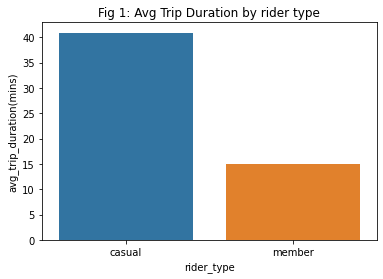

In [27]:
print(f"Average trip duration is : {round(summary_by_days['avg_trip_duration(mins)'].mean(),2)} mins")
plot = sns.barplot(x="rider_type" , y = "avg_trip_duration(mins)", ci = None,  data= summary_by_days)
plot.set(title ="Fig 1: Avg Trip Duration by rider type")
plt.show()

The average trip duration of member riders is lower than the average trip duration of all riders, while it is exactly the opposite for casual riders, whose average trip duration is higher than the the average trip duration of all trips. This reflects that casual riders usually take the bikes out for a longer duration compared to member riders.


### Average trip duration by each day of week

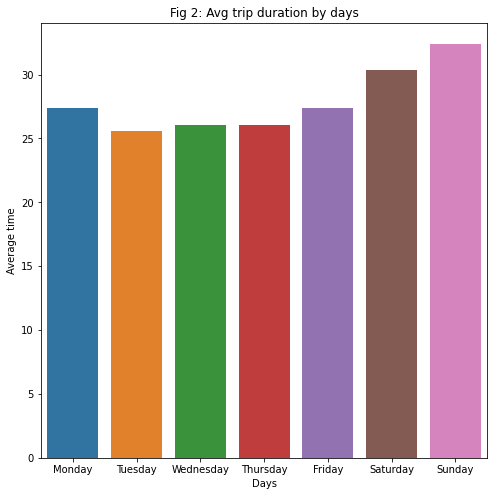

In [28]:
plt.figure(figsize=(8,8))
plot = sns.barplot(x="day_of_week" , y = "avg_trip_duration(mins)", ci = None,  data= summary_by_days)
plot.set(title ="Fig 2: Avg trip duration by days" ,xlabel = "Days" , ylabel = "Average time")
plt.show()

From the above graph, it can be seen that riders have taken the bikes for longer duration on weekends followed by Monday.

### Number of rides by each day of week

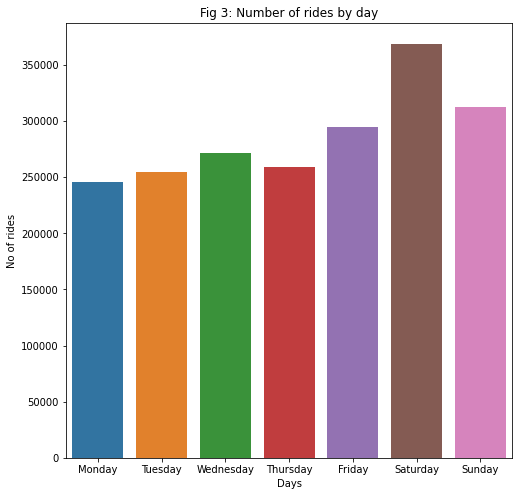

In [29]:
plt.figure(figsize=(8,8))
plot = sns.barplot(x="day_of_week" , y = "rides_per_day", ci= None , data= summary_by_days)
plot.set(title ="Fig 3: Number of rides by day",xlabel = "Days" , ylabel = "No of rides")
plt.show()

Customers take more number of rides during Friday-Sunday with Saturday being the day with most number of rides. 

### Avg trip duration per day of week by each rider type


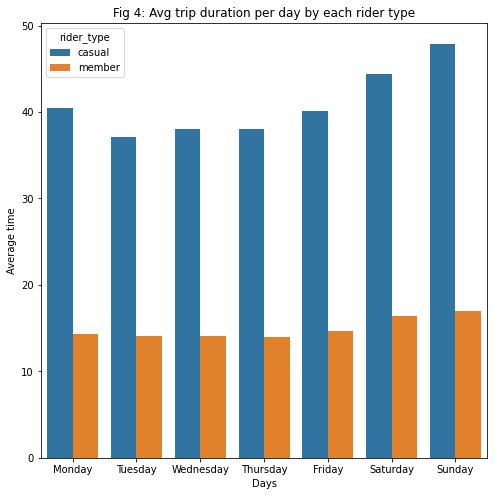

In [30]:
plt.figure(figsize=(8,8))
plot = sns.barplot(x="day_of_week" , y = "avg_trip_duration(mins)", hue = "rider_type", data= summary_by_days)
plot.set(title ="Fig 4: Avg trip duration per day by each rider type",xlabel = "Days" , ylabel = "Average time")
plt.show()

The average trip duration of a casual rider is more than twice that of a member. Note that this necessarily does not mean that casual riders travel farther distance. It is also interesting to note that weekends not only contribute to more number of trips but also longer trips on average when compared to weekdays.



### Number of rides per day of week by each rider type


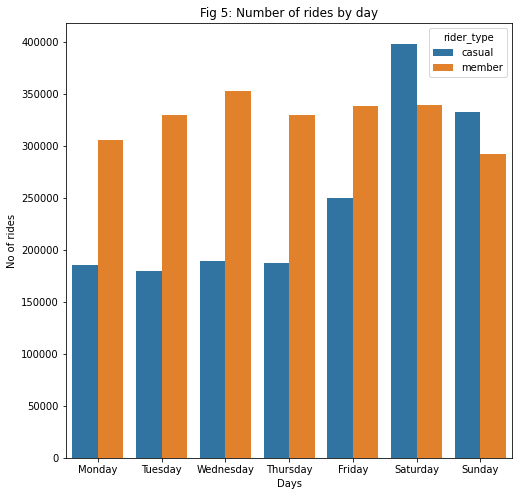

In [31]:
plt.figure(figsize=(8,8))
plot = sns.barplot(x="day_of_week" , y = "rides_per_day", hue = "rider_type", data= summary_by_days)
plot.set(title ="Fig 5: Number of rides by day",xlabel = "Days" , ylabel = "No of rides")
plt.show()

From the graph above, casual riders have purchased a highest number of ride on Saturdays followed by Sundays, while member riders have purchased a highest number of ride on Wednesday followed by Friday and Saturday and the least on Sundays.



### Stacked bar of bike type rides per day


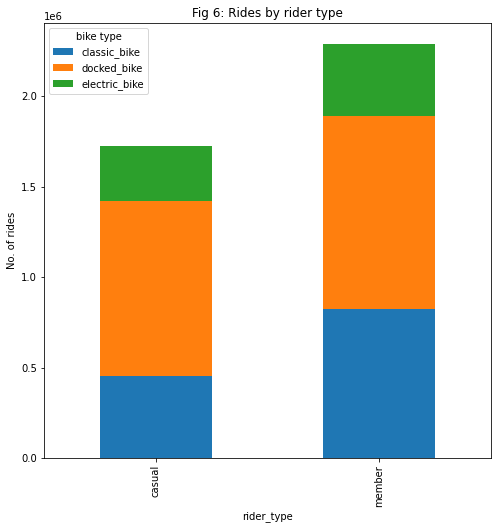

In [32]:
agg_bike_type = df.groupby(['rider_type', 'bike type'])['bike type'].count().unstack()
agg_bike_type.plot(kind = 'bar', stacked = True , figsize= (8,8))
plt.ylabel("No. of rides")
plt.title("Fig 6: Rides by rider type")
plt.show()

From the above graph, what is noticable is that docked bikes are in most demand and equally used by both member riders as well as casual riders. However, the ratio of bike type to the rider type appears to be almost same.

Note: Data is not available on the quantity of fleet across each type of bikes.


### Number of rides by each month


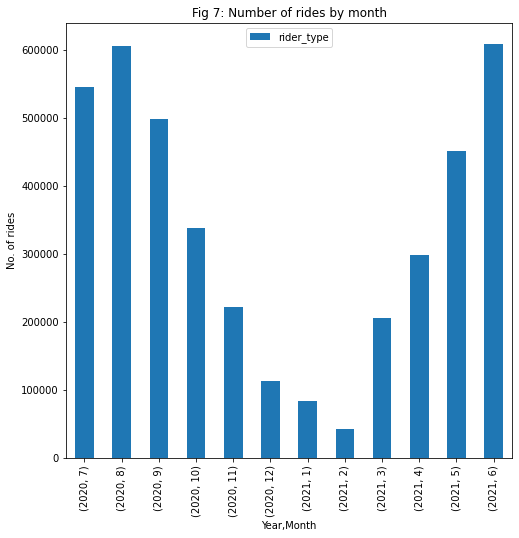

In [33]:
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')
monthly_rides = df.groupby([df['start_time'].dt.year, df['start_time'].dt.month]).agg({'rider_type':'count'})
monthly_rides.plot(kind= 'bar' , figsize= (8,8))
plt.xlabel("Year,Month")
plt.ylabel("No. of rides")
plt.title("Fig 7: Number of rides by month")
plt.show()

From the above graph, it appears that a very high number of purchasing was done during the July-Nov 2020 period. Dec 2020 - Feb 2021 shows a steep fall in purchasing and rises again staring from Mar 2021. This could be attributed to an external factor (eg. cold weather, major quality issue) that might have hindered with customer needs or could be due to the pandemic or work from home.




### Key Takeaways


* **Casual riders** made **43%** of total trips contributing to **68%** of total trip duration between Jul'20 - Jun'21. **Member riders** make up **57%** of total trips contributing to **32%** of total trip duration between Jul'20 - Jun'21


* Usage (based on trip duration) of bikes by casual riders is more than **twice** that of member riders.


* Casual customers use bikeshare services more during weekends, while members use them consistently over the entire week.


* Average trip duration of casual riders is more than **twice** that of member rider over any given day of the week cumulatively.


* Preference of bike type was almost same between the rider type considering the total riders. However, **docked bikes** is most popular among both rider type.








### Recommendations

* Provide attractive promotions for casual riders on weekdays so that casual members use the bikeshare services more uniformly across the entire week.


* Offer discounted membership fee for renewals after the first year. It might nudge casual riders to take up membership.

